In [61]:
#This ensures that our graphs will be shown properly in the notebook
%matplotlib inline
#Also import pandas
import pandas as pd

##### Import Zipline functions that we need

In [62]:
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

##### Import date and time zone libraries

In [63]:
from datetime import datetime
import pytz

##### Import vizualization library

In [64]:
import matplotlib.pyplot as plt

#### initialize function

In [65]:
def initialize(context):
    #which stock to trade
    context.stock = symbol('AAPL')

    #moving average window
    context.index_average_window=100

#### handle_data function

In [66]:
def handle_data(context, data):
    #request history for the stock
    equities_hist = data.history(context.stock, 'close', context.index_average_window, '1d')
    # Check if price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight=1.0
    else:
        stock_weight=0.0
    
    # Place order
    order_target_percent(context.stock, stock_weight)

#### Analyze function

In [67]:
def analyze(context, perf):
    fig = plt.figure(figsize=(12,8))

    #First chart
    ax=fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)

    #Second chart
    ax=fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    #Third chart
    ax=fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

##### Set start and end time

In [68]:
#start_date=datetime(1996,1,1,tzinfo=pytz.UTC)
#end_date=datetime(2018,12,31,tzinfo=pytz.UTC)
start_date = pd.Timestamp('1996-1-1',tz='utc')
end_date = pd.Timestamp('2018-12-31',tz='utc')

#### Fire off the backtest

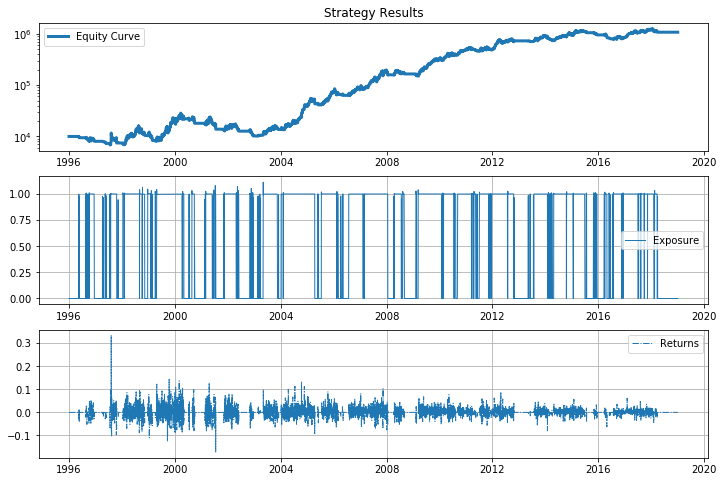

In [69]:
results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=10000,
    data_frequency='daily',
    bundle='quandl')